In [1]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import statsmodels.api as sm

d:\python-installed\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
AirQualityCat = ['air-qual-good','air-qual-moderate','air-qual-unhealthy','air-qual-hazardous']
WeatherCat = ['rainy','stormy','sunny','cloudy','hot','cold','dry','wet','windy','snow']
TrafficCat = ['low','moderate','high','worse']
DayPartCat = ['early-morning','morning','noon','afternoon','night','late-night']
BikeLanesCat = ['none','partial','full']
TermperatureCat = ['t-0-10','t-10-14','t-14-18','t-18-21','t-21-25','t-25-30','t-30-40','t-40-60','t-60-80','t-80-100']
ModesCat = ['car','transit','bike','walk']

In [3]:
CatCombined = []
CatCombined.extend(AirQualityCat)
CatCombined.extend(WeatherCat)
CatCombined.extend(TrafficCat)
CatCombined.extend(DayPartCat)
CatCombined.extend(BikeLanesCat)
CatCombined.extend(TermperatureCat)

IndCombined = []
IndCombined.extend(CatCombined)
CatCombined.extend(ModesCat)

In [4]:
def WriteArray(lv_array,fileHandler):
    for i in range(len(lv_array)):
        fileHandler.write(str(lv_array[i]))
        if i != len(lv_array) - 1:
            fileHandler.write(',')
    fileHandler.write('\n')

In [5]:


fhand = open('sample.csv','a')
WriteArray(CatCombined,fhand)

for i in range(50):
    
    tInt = rnd.randint(0,len(AirQualityCat) - 1)
    AirQualityMat = [0] * len(AirQualityCat)
    AirQualityMat[tInt] = 1

    tInt = rnd.randint(0,len(WeatherCat) - 1)
    WeatherMat = [0] * len(WeatherCat)
    WeatherMat[tInt] = 1

    tInt = rnd.randint(0,len(TrafficCat) - 1)
    TrafficMat = [0] * len(TrafficCat)
    TrafficMat[tInt] = 1

    tInt = rnd.randint(0,len(DayPartCat) - 1)
    DayPartMat = [0] * len(DayPartCat)
    DayPartMat[tInt] = 1

    tInt = rnd.randint(0,len(BikeLanesCat) - 1)
    BikeLanesMat = [0] * len(BikeLanesCat)
    BikeLanesMat[tInt] = 1

    tInt = rnd.randint(0,len(TermperatureCat) - 1)
    TemperatureMat = [0] * len(TermperatureCat)
    TemperatureMat[tInt] = 1

    tInt = rnd.randint(0,len(ModesCat) - 1)
    ModesMat = [0] * len(ModesCat)
    ModesMat[tInt] = 1
    
    MatCombined = []
    MatCombined.extend(AirQualityMat)
    MatCombined.extend(WeatherMat)
    MatCombined.extend(TrafficMat)
    MatCombined.extend(DayPartMat)
    MatCombined.extend(BikeLanesMat)
    MatCombined.extend(TemperatureMat)
    MatCombined.extend(ModesMat)
    
    WriteArray(MatCombined,fhand)
    
    
fhand.close()

In [6]:
dt_frame = pd.read_csv('sample.csv')
#dt_frame.good.hist(by=dt_frame.car)
#dt_frame.describe()
#dt_frame.std()
dt_frame.cov()

,air-qual-good,air-qual-moderate,air-qual-unhealthy,air-qual-hazardous,rainy,stormy,sunny,cloudy,hot,cold,...,t-21-25,t-25-30,t-30-40,t-40-60,t-60-80,t-80-100,car,transit,bike,walk
air-qual-good,0.222041,-0.078367,-6.530612e-02,-0.078367,-0.019592,8.163265e-03,-0.013061,0.043265,0.022041,-0.011429,...,-0.026122,-0.019592,0.001633,0.028571,-0.026122,8.163265e-03,-0.031837,0.003265,0.011429,0.017143
air-qual-moderate,-0.078367,0.186122,-4.897959e-02,-0.058776,0.005714,-4.081633e-03,0.010612,-0.023673,-0.008980,0.042449,...,0.000816,0.005714,0.031837,-0.004082,0.000816,-4.081633e-03,-0.018776,0.022857,-0.001633,-0.002449
air-qual-unhealthy,-0.065306,-0.048980,1.632653e-01,-0.048980,0.008163,3.647876e-18,-0.008163,0.004082,-0.024490,-0.012245,...,0.024490,0.008163,-0.004082,-0.020408,0.004082,2.514995e-18,0.028571,-0.008163,-0.028571,0.008163
air-qual-hazardous,-0.078367,-0.058776,-4.897959e-02,0.186122,0.005714,-4.081633e-03,0.010612,-0.023673,0.011429,-0.018776,...,0.000816,0.005714,-0.029388,-0.004082,0.021224,-4.081633e-03,0.022041,-0.017959,0.018776,-0.022857
rainy,-0.019592,0.005714,8.163265e-03,0.005714,0.057551,-6.122449e-03,-0.002449,-0.011020,-0.007347,-0.009796,...,-0.004898,0.016735,-0.007347,-0.006122,-0.004898,-6.122449e-03,-0.009796,0.005714,-0.000408,0.004490
stormy,0.008163,-0.004082,3.647876e-18,-0.004082,-0.006122,9.183673e-02,-0.004082,-0.018367,-0.012245,-0.016327,...,-0.008163,-0.006122,-0.012245,-0.010204,-0.008163,3.061224e-02,-0.016327,-0.024490,0.026531,0.014286
sunny,-0.013061,0.010612,-8.163265e-03,0.010612,-0.002449,-4.081633e-03,0.039184,-0.007347,-0.004898,-0.006531,...,-0.003265,-0.002449,-0.004898,-0.004082,0.017143,-4.081633e-03,0.013878,-0.009796,0.006531,-0.010612
cloudy,0.043265,-0.023673,4.081633e-03,-0.023673,-0.011020,-1.836735e-02,-0.007347,0.150612,-0.022041,-0.029388,...,0.046531,-0.011020,-0.022041,0.002041,0.005714,2.040816e-03,-0.008980,0.037551,-0.001224,-0.027347
hot,0.022041,-0.008980,-2.448980e-02,0.011429,-0.007347,-1.224490e-02,-0.004898,-0.022041,0.107755,-0.019592,...,-0.009796,-0.007347,0.026122,-0.012245,0.010612,-1.224490e-02,0.041633,-0.029388,-0.021224,0.008980
cold,-0.011429,0.042449,-1.224490e-02,-0.018776,-0.009796,-1.632653e-02,-0.006531,-0.029388,-0.019592,0.137143,...,-0.013061,0.031020,0.000816,0.004082,-0.013061,4.081633e-03,0.014694,0.001633,0.026122,-0.042449


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002142DE9C208>,
      dtype=object)

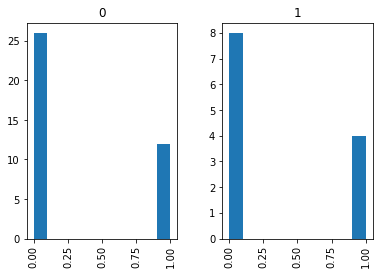

In [9]:
dt_frame["air-qual-good"].hist(by=dt_frame.transit)

In [10]:
dt_frame.corr()

,air-qual-good,air-qual-moderate,air-qual-unhealthy,air-qual-hazardous,rainy,stormy,sunny,cloudy,hot,cold,...,t-21-25,t-25-30,t-30-40,t-40-60,t-60-80,t-80-100,car,transit,bike,walk
air-qual-good,1.000000,-0.385496,-3.429972e-01,-0.385496,-0.173313,5.716620e-02,-0.140028,0.236588,0.142493,-0.065492,...,-0.202289,-0.173313,0.010555,0.200082,-0.202289,5.716620e-02,-0.182442,0.016062,0.050685,0.082106
air-qual-moderate,-0.385496,1.000000,-2.809757e-01,-0.315789,0.055212,-3.121953e-02,0.124267,-0.141394,-0.063407,0.265694,...,0.006905,0.055212,0.224807,-0.031220,0.006905,-3.121953e-02,-0.117518,0.122807,-0.007909,-0.012811
air-qual-unhealthy,-0.342997,-0.280976,1.000000e+00,-0.280976,0.084215,3.469447e-17,-0.102062,0.026029,-0.184637,-0.081832,...,0.221163,0.084215,-0.030773,-0.166667,0.036860,3.006854e-17,0.190941,-0.046829,-0.147770,0.045596
air-qual-hazardous,-0.385496,-0.315789,-2.809757e-01,1.000000,0.055212,-3.121953e-02,0.124267,-0.141394,0.080700,-0.117518,...,0.006905,0.055212,-0.207514,-0.031220,0.179520,-3.121953e-02,0.137956,-0.096491,0.090948,-0.119573
rainy,-0.173313,0.055212,8.421519e-02,0.055212,1.000000,-8.421519e-02,-0.051571,-0.118370,-0.093296,-0.110264,...,-0.074501,0.290780,-0.093296,-0.084215,-0.074501,-8.421519e-02,-0.110264,0.055212,-0.003556,0.042239
stormy,0.057166,-0.031220,3.469447e-17,-0.031220,-0.084215,1.000000e+00,-0.068041,-0.156174,-0.123091,-0.145479,...,-0.098295,-0.084215,-0.123091,-0.111111,-0.098295,3.333333e-01,-0.145479,-0.187317,0.182953,0.106391
sunny,-0.140028,0.124267,-1.020621e-01,0.124267,-0.051571,-6.804138e-02,1.000000,-0.095637,-0.075378,-0.089087,...,-0.060193,-0.051571,-0.075378,-0.068041,0.316013,-6.804138e-02,0.189310,-0.114708,0.068945,-0.120994
cloudy,0.236588,-0.141394,2.602896e-02,-0.141394,-0.118370,-1.561738e-01,-0.095637,1.000000,-0.173013,-0.204479,...,0.437505,-0.118370,-0.173013,0.017353,0.053729,1.735264e-02,-0.062480,0.224281,-0.006594,-0.159034
hot,0.142493,-0.063407,-1.846372e-01,0.080700,-0.093296,-1.230915e-01,-0.075378,-0.173013,1.000000,-0.161165,...,-0.108893,-0.093296,0.242424,-0.123091,0.117968,-1.230915e-01,0.342475,-0.207514,-0.135120,0.061737
cold,-0.065492,0.265694,-8.183171e-02,-0.117518,-0.110264,-1.454786e-01,-0.089087,-0.204479,-0.161165,1.000000,...,-0.128698,0.349168,0.006715,0.036370,-0.128698,3.636965e-02,0.107143,0.010219,0.147411,-0.258697


In [11]:
[dt_frame.mean(),dt_frame.std()]

[air-qual-good         0.32
 air-qual-moderate     0.24
 air-qual-unhealthy    0.20
 air-qual-hazardous    0.24
 rainy                 0.06
 stormy                0.10
 sunny                 0.04
 cloudy                0.18
 hot                   0.12
 cold                  0.16
 dry                   0.06
 wet                   0.14
 windy                 0.10
 snow                  0.04
 low                   0.30
 moderate              0.24
 high                  0.22
 worse                 0.24
 early-morning         0.16
 morning               0.14
 noon                  0.16
 afternoon             0.22
 night                 0.14
 late-night            0.18
 none                  0.28
 partial               0.30
 full                  0.42
 t-0-10                0.08
 t-10-14               0.20
 t-14-18               0.06
 t-18-21               0.12
 t-21-25               0.08
 t-25-30               0.06
 t-30-40               0.12
 t-40-60               0.10
 t-60-80            

In [12]:
for i in range(len(IndCombined)):    
    for j in range(len(ModesCat)):
        cr_tab = pd.crosstab(index=dt_frame[CatCombined[i]],columns=[dt_frame[ModesCat[j]]],margins=True)
        print(cr_tab)
        print('\n')

car             0  1  All
air-qual-good            
0              27  7   34
1              15  1   16
All            42  8   50


transit         0   1  All
air-qual-good             
0              26   8   34
1              12   4   16
All            38  12   50


bike            0   1  All
air-qual-good             
0              23  11   34
1              10   6   16
All            33  17   50


walk            0   1  All
air-qual-good             
0              26   8   34
1              11   5   16
All            37  13   50


car                 0  1  All
air-qual-moderate            
0                  31  7   38
1                  11  1   12
All                42  8   50


transit             0   1  All
air-qual-moderate             
0                  30   8   38
1                   8   4   12
All                38  12   50


bike                0   1  All
air-qual-moderate             
0                  25  13   38
1                   8   4   12
All                33  1

transit   0   1  All
morning             
0        31  12   43
1         7   0    7
All      38  12   50


bike      0   1  All
morning             
0        29  14   43
1         4   3    7
All      33  17   50


walk      0   1  All
morning             
0        32  11   43
1         5   2    7
All      37  13   50


car    0  1  All
noon            
0     35  7   42
1      7  1    8
All   42  8   50


transit   0   1  All
noon                
0        33   9   42
1         5   3    8
All      38  12   50


bike   0   1  All
noon             
0     28  14   42
1      5   3    8
All   33  17   50


walk   0   1  All
noon             
0     30  12   42
1      7   1    8
All   37  13   50


car         0  1  All
afternoon            
0          32  7   39
1          10  1   11
All        42  8   50


transit     0   1  All
afternoon             
0          28  11   39
1          10   1   11
All        38  12   50


bike        0   1  All
afternoon             
0          28  11   39
1  

In [13]:
dt_frame.iloc[:,-4:]

,car,transit,bike,walk
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,1,0,0,0
8,0,0,1,0
9,0,0,1,0


In [14]:
ind_cols = dt_frame.columns[[0,4,14,18,24,27]]
dep_cols = dt_frame.columns[-1:]
logits = sm.Logit(dt_frame[dep_cols],dt_frame[ind_cols])


In [15]:
result = logits.fit(maxiter=1000)

Optimization terminated successfully.
         Current function value: 0.644140
         Iterations 5


In [16]:
result

In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   walk   No. Observations:                   50
Model:                          Logit   Df Residuals:                       44
Method:                           MLE   Df Model:                            5
Date:                Thu, 01 Mar 2018   Pseudo R-squ.:                 -0.1240
Time:                        14:43:26   Log-Likelihood:                -32.207
converged:                       True   LL-Null:                       -28.653
                                        LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
air-qual-good    -0.4848      0.611     -0.793      0.428      -1.683       0.713
rainy            -0.1814      1.325     -0.137      0.891      -2.778       2.415
low              -0.3781      0.611     -0.619      0.536      -1.576       0.819
early-morning    -0.8524      0.847     -1.007      0.314      -2.512       0.807
none             -0.0939      0.641     -0.146      0.884      -1.351       1.163
t-0-10           -0.7780      1.194     -0.652      0.515      -3.117       1.562
=================================================================================
"""

In [18]:
np.exp(result.params)

air-qual-good    0.615845
rainy            0.834125
low              0.685143
early-morning    0.426387
none             0.910345
t-0-10           0.459340
dtype: float64